# Tutorial 2: Slide-seqV2 mouse olfactory bulb

This tutorial demonstrates how to identify spatial domains on Slide-seqV2 mouse olfactory bulb data.

In this tutorial, we foucs on the special section of Slide-seqV2 mouse olfactory bulb data (Puck_200127_15 from https://singlecell.broadinstitute.org/single_cell/study/SCP815/highly-sensitive-spatial-transcriptomics-at-near-cellular-resolution-with-slide-seqv2#study-summary).

We removed spots outside the main tissue area, and the used data (h5ad format) can be downloaded from https://zenodo.org/record/8141084.

## Loading package

In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from STGMVA.STGMVA import STGMMVE
from STGMVA import read_adata
from STGMVA import mk_dir

2023-07-14 15:49:49.866307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Reading ST data

In [3]:
adata = sc.read("/home/tengliu/Paper6-NC/STGMVA_Tutorials/ST data/Slide_seqV2.h5ad") # read data

In [4]:
adata

AnnData object with n_obs × n_vars = 20139 × 21220
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

## Create directory for pretrained model

In [5]:
save_path='./results_save/'
section_id = 'Slide_seqV2'
mk_dir(save_path,section_id)

## Training the model

STGMVA aims to learn the representations by two-step process. First, pretrained the GMM clustering model. Second, discerned the spatial domains for spatial transcriptomics data. 

After model training, the learned representations will be saved in adata.obsm['embedding'], and can be used for spatial clustering. 

In [6]:
model = STGMMVE(adata, datatype = "Slide", nCluster=11,save_path=save_path, section_id=section_id)

# model.pretrain() # Train your own pretranined model or use the pretrained model we provided.

adata_res = model.train_cluster()


Graph constructed!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


  0%|          | 0/50 [01:31<?, ?it/s]

Epoch: 0
NMI=0.482742, ARI=0.374155
Loss=109.8452,  ELBO Loss=154.2428


 10%|█         | 5/50 [07:19<56:52, 75.83s/it]  

Epoch: 5
NMI=0.506505, ARI=0.341488
Loss=106.7722,  ELBO Loss=144.9140


 20%|██        | 10/50 [13:42<51:16, 76.91s/it]

Epoch: 10
NMI=0.483681, ARI=0.323402
Loss=104.2417,  ELBO Loss=138.2862


 30%|███       | 15/50 [20:12<50:31, 86.61s/it]

Epoch: 15
NMI=0.485576, ARI=0.326409
Loss=102.1839,  ELBO Loss=133.9442


 40%|████      | 20/50 [25:33<30:21, 60.72s/it]

Epoch: 20
NMI=0.494546, ARI=0.316261
Loss=100.8771,  ELBO Loss=130.8482


 50%|█████     | 25/50 [30:49<26:54, 64.57s/it]

Epoch: 25
NMI=0.509961, ARI=0.320659
Loss=100.2059,  ELBO Loss=128.7933


 60%|██████    | 30/50 [36:50<22:22, 67.12s/it]

Epoch: 30
NMI=0.478832, ARI=0.330350
Loss=99.8300,  ELBO Loss=127.2917


 70%|███████   | 35/50 [42:20<18:33, 74.23s/it]

Epoch: 35
NMI=0.487603, ARI=0.298855
Loss=99.3789,  ELBO Loss=126.2081


 80%|████████  | 40/50 [48:51<11:33, 69.36s/it]

Epoch: 40
NMI=0.486233, ARI=0.304436
Loss=99.1507,  ELBO Loss=125.4818


 90%|█████████ | 45/50 [54:48<06:32, 78.42s/it]

Epoch: 45
NMI=0.481765, ARI=0.277744
Loss=99.0267,  ELBO Loss=124.9700


100%|██████████| 50/50 [1:00:48<00:00, 72.96s/it]


In [7]:
adata_res

AnnData object with n_obs × n_vars = 20139 × 21220
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pre_label'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'mclust_labels', 'ari_list', 'loss'
    obsm: 'spatial', 'graph_neigh', 'adj', 'feat_mat', 'embedding'

## Visualization

/home/tengliu/miniconda3/envs/Torch_pyG2.0/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(588.545, 5108.555, 847.6700000000001, 5670.73)

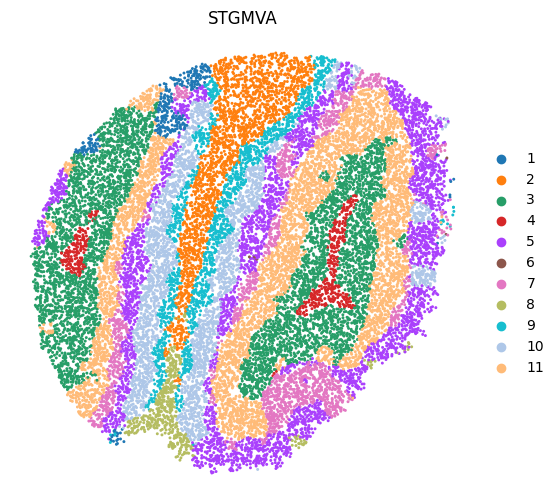

In [10]:
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.embedding(adata_res, basis="spatial", color="pre_label",s=18, show=False, title='STGMVA')
plt.axis('off')

/home/tengliu/miniconda3/envs/Torch_pyG2.0/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'Predicted labels'}, xlabel='UMAP1', ylabel='UMAP2'>

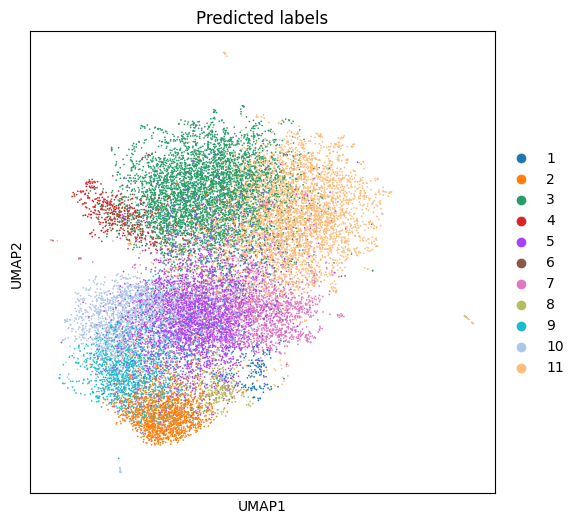

In [11]:
# plotting predicted labels by UMAP
sc.pp.neighbors(adata_res, use_rep='embedding', n_neighbors=10)
sc.tl.umap(adata_res)
sc.pl.umap(adata_res, color='pre_label', title=['Predicted labels'], show=False)